<a href="https://colab.research.google.com/github/srikanth2102/DIABETES-DIAGNOSIS/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES DIAGNOSIS**

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#uploading the file in the device to google colab
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
#Reading File using Pandas
data =pd.read_csv("diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Spliting the features and labels
Y_data = data['Outcome']
X_data = data.drop(['Outcome'],axis=1)
X_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_dummy,Y_train,Y_dummy = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)

X_test,X_val,Y_test,Y_val = train_test_split(X_dummy, Y_dummy, test_size=0.5, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)

(614, 8) (77, 8) (77, 8)


In [6]:
#creating a dictionary to store the validation score of models
models = dict()

**LOGISTIC REGRESSION**

In [130]:
#importing Logistic regression model
from sklearn.linear_model import LogisticRegression

#model fitting
log_reg= LogisticRegression(max_iter=500,C=1,tol=10)
log_reg.fit(X_train,Y_train)

#prediction on validation set
Y_pred_log_reg = log_reg.predict(X_val)

#importing metrics for evaluvation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#evaluvating accuracy of validation set
print("accuracy of validation set", accuracy_score(Y_val,Y_pred_log_reg),"\n")

#evaluvating precision for validation set
print("precision of validation set", precision_score(Y_val,Y_pred_log_reg),"\n")

#evaluvating recall for validation set
print("recall_score of validation set", recall_score(Y_val,Y_pred_log_reg),'\n')

#evaluvating F1_score for validation set
print("F1_score of validation set", f1_score(Y_val,Y_pred_log_reg),'\n')

accuracy of validation set 0.7532467532467533 

precision of validation set 0.6774193548387096 

recall_score of validation set 0.7 

F1_score of validation set 0.6885245901639343 



In [115]:
#adding f1 score of model in the dictionary
models['log_reg']=f1_score(Y_val,Y_pred_log_reg)

**SUPPORT VECTOR MACHINE**

In [131]:
#importing svm 
from sklearn import svm

#model fitting
svm=svm.SVC(kernel='rbf', C=15, gamma=0.00001)
svm.fit(X_train,Y_train)

#prediction on validation set
Y_pred_svm=svm.predict(X_val)

#evaluvating accuracy of validation set
print("accuracy of validation set", accuracy_score(Y_val,Y_pred_svm),"\n")

#evaluvating precision for validation set
print("precision of validation set", precision_score(Y_val,Y_pred_svm),"\n")

#evaluvating recall for validation set
print("recall_score of validation set", recall_score(Y_val,Y_pred_svm),'\n')

#evaluvating F1_score for validation set
print("F1_score of validation set", f1_score(Y_val,Y_pred_svm),'\n')

accuracy of validation set 0.7792207792207793 

precision of validation set 0.76 

recall_score of validation set 0.6333333333333333 

F1_score of validation set 0.6909090909090909 



In [117]:
#adding f1 score of model in the dictionary
models['svm']=f1_score(Y_val,Y_pred_svm)

**DECISION TREE**

In [132]:
#importing decison tree
from sklearn import tree

#model fitting
tree = tree.DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, Y_train)

#prediction on validation set
Y_pred_tree= tree.predict(X_val)

#evaluvating accuracy of validation set
print("accuracy of validation set", accuracy_score(Y_val,Y_pred_tree),"\n")

#evaluvating precision for validation set
print("precision of validation set", precision_score(Y_val,Y_pred_tree),"\n")

#evaluvating recall for validation set
print("recall_score of validation set", recall_score(Y_val,Y_pred_tree),'\n')

#evaluvating F1_score for validation set
print("F1_score of validation set", f1_score(Y_val,Y_pred_tree),'\n')

accuracy of validation set 0.7922077922077922 

precision of validation set 0.7333333333333333 

recall_score of validation set 0.7333333333333333 

F1_score of validation set 0.7333333333333333 



In [119]:
#adding f1 score of model in the dictionary
models['tree']=f1_score(Y_val,Y_pred_tree)

**RANDOM FOREST**

In [133]:
#importing Random Forest
from sklearn import ensemble

#model fitting
forest= ensemble.RandomForestClassifier()
forest.fit(X_train,Y_train)

#prediction on validation set
Y_pred_forest = tree.predict(X_val)

#evaluvating accuracy of validation set
print("accuracy of validation set", accuracy_score(Y_val,Y_pred_forest),"\n")

#evaluvating precision for validation set
print("precision of validation set", precision_score(Y_val,Y_pred_forest),"\n")

#evaluvating recall for validation set
print("recall_score of validation set", recall_score(Y_val,Y_pred_forest),'\n')

#evaluvating F1_score for validation set
print("F1_score of validation set", f1_score(Y_val,Y_pred_forest),'\n')

accuracy of validation set 0.7922077922077922 

precision of validation set 0.7333333333333333 

recall_score of validation set 0.7333333333333333 

F1_score of validation set 0.7333333333333333 



In [120]:
#adding f1 score of model in the dictionary
models['forest']=f1_score(Y_val,Y_pred_forest)

**BOOSTING (using decision tree)**

In [135]:
#importing model
from sklearn import ensemble
boosting = ensemble.GradientBoostingClassifier(n_estimators=45,max_depth=3, max_leaf_nodes=4)

#fitting model
boosting.fit(X_train,Y_train)

#prediction on validation set
Y_pred_boosting = boosting.predict(X_val)

#evaluvating accuracy of validation set
print("accuracy of validation set", accuracy_score(Y_val,Y_pred_boosting),"\n")

#evaluvating precision for validation set
print("precision of validation set", precision_score(Y_val,Y_pred_boosting),"\n")

#evaluvating recall for validation set
print("recall_score of validation set", recall_score(Y_val,Y_pred_boosting),'\n')

#evaluvating F1_score for validation set
print("F1_score of validation set", f1_score(Y_val,Y_pred_boosting),'\n')

accuracy of validation set 0.7922077922077922 

precision of validation set 0.7692307692307693 

recall_score of validation set 0.6666666666666666 

F1_score of validation set 0.7142857142857142 



In [121]:
#adding f1 score of model in the dictionary
models['boosting']=f1_score(Y_val,Y_pred_boosting)

**MLP CLASSIFIER**

In [136]:
#importing the model 
from sklearn import neural_network

#model fitting
mlp = neural_network.MLPClassifier(activation='identity',shuffle=False, max_iter=1000, alpha=0.01)
mlp.fit(X_train,Y_train)

#prediction on validation set
Y_pred_mlp = mlp.predict(X_val)

#evaluvating accuracy of validation set
print("accuracy of validation set", accuracy_score(Y_val,Y_pred_mlp),"\n")

#evaluvating precision for validation set
print("precision of validation set", precision_score(Y_val,Y_pred_mlp),"\n")

#evaluvating recall for validation set
print("recall_score of validation set", recall_score(Y_val,Y_pred_mlp),'\n')

#evaluvating F1_score for validation set
print("F1_score of validation set", f1_score(Y_val,Y_pred_mlp),'\n')

accuracy of validation set 0.7402597402597403 

precision of validation set 0.6470588235294118 

recall_score of validation set 0.7333333333333333 

F1_score of validation set 0.6875 



In [139]:
#adding f1 score of model in the dictionary
models['mlp']=f1_score(Y_val,Y_pred_mlp)
models

{'boosting': 0.7142857142857142,
 'forest': 0.7213114754098361,
 'log_reg': 0.6909090909090909,
 'mlp': 0.6875,
 'svm': 0.6909090909090909,
 'tree': 0.7213114754098361}

In [138]:
#selecting the best model
best_model_score=0
for i in models.keys():
  if(float(models[i])>float(best_model_score)):
    best_model_score=models[i]
    best_model=i
print(best_model,best_model_score)

tree 0.7213114754098361


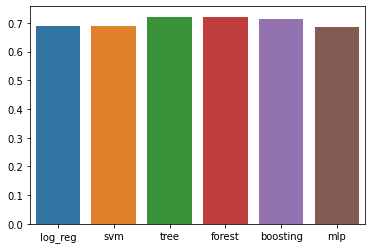

In [137]:
#representing the score of all models 
from seaborn import barplot
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
barplot(x=model_names,y=accuracy)

**THE BEST MODEL:**
          The model with the best F1_score is decision_tree. But the decison tree doesnt generalise the training set well. So while using for the testing set, we can use MLP classifier since it is generalises well.

In [150]:
#prediction on testing set
Y_pred = mlp.predict(X_test)

#evaluvating accuracy of test set
print("accuracy of test set", accuracy_score(Y_test,Y_pred),"\n")

#evaluvating precision for test set
print("precision of test set", precision_score(Y_test,Y_pred),"\n")

#evaluvating recall for test set
print("recall_score of test set", recall_score(Y_test,Y_pred),'\n')

#evaluvating F1_score for test set
print("F1_score of testing set", f1_score(Y_test,Y_pred),'\n')

accuracy of test set 0.7662337662337663 

precision of test set 0.6206896551724138 

recall_score of test set 0.72 

F1_score of testing set 0.6666666666666666 



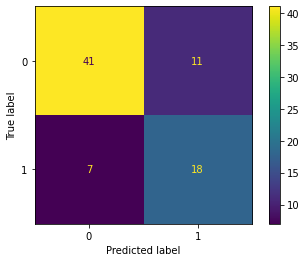

In [153]:
# confusion matrix for the testing set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(Y_test,Y_pred)
cm = confusion_matrix(Y_test, Y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()